In [1]:
from IPython.display import clear_output
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
import random, shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import load_model
import cv2

In [24]:
from skimage.feature import canny

In [19]:

def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

def generator2(dir, gen=image.ImageDataGenerator(rescale=1./255, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True), shuffle=True, batch_size=8, target_size=(64, 64), class_mode='categorical'):
    return gen.flow_from_directory(dir, batch_size=batch_size, shuffle=shuffle, color_mode='grayscale', class_mode=class_mode, target_size=target_size)


BS= 8
TS=(24,24)

train_batch= generator2('datacnn/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator2('datacnn/valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


# img,labels= next(train_batch)
# print(img.shape)

model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    #Dense(128, activation='relu'),
     Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    #Dense(2, activation='softmax')
    Dense(4, activation='softmax')
])

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])





Found 133 images belonging to 4 classes.
Found 43 images belonging to 4 classes.
16 5


In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 64)      

In [23]:
#model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)
hist = model.fit(train_batch, validation_data=valid_batch,epochs=10,steps_per_epoch=SPE ,validation_steps=VS)



Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1264.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\josep\AppData\Local\Temp\ipykernel_31852\1097316579.py", line 2, in <module>
      hist = model.fit(train_batch, validation_data=valid_batch,epochs=10,steps_per_epoch=SPE ,validation_steps=VS)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [8,4] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_15614]

## Plot Performance

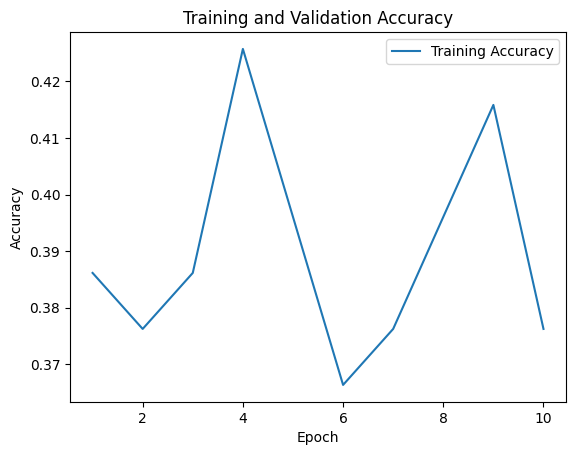

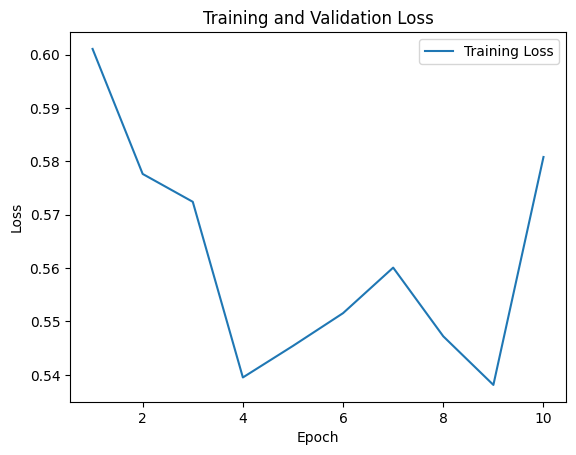

In [14]:
# Retrieve the training accuracy, loss, validation accuracy, and validation loss
accuracy = hist.history['accuracy']
loss = hist.history['loss']
#val_accuracy = hist.history['val_accuracy']
#val_loss = hist.history['val_loss']

# Plotting the accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
#plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting the loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
#plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Save the trained model

In [7]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [8]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [10]:
model.save('models/cnnCat2Plants.h5', overwrite=True)

## Evaluate our trained model

In [11]:
# Load the trained model
model = load_model('models/cnnCat2Plants.h5')

# Create a new generator for the test data
test_batch = generator('datacnn/valid', shuffle=False, batch_size=2, target_size=TS)

# Get the total number of test samples
total_test_samples = len(test_batch.classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_batch, steps=total_test_samples)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 30 images belonging to 4 classes.
30/30 [==============================] - 1s 12ms/step - loss: 1.4136 - accuracy: 0.6667
Test Loss: 1.4135913848876953
Test Accuracy: 0.6666666865348816


## Plot a confusion matrix based on the predictions made by the model,

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

30/30 [==============================] - 1s 14ms/step


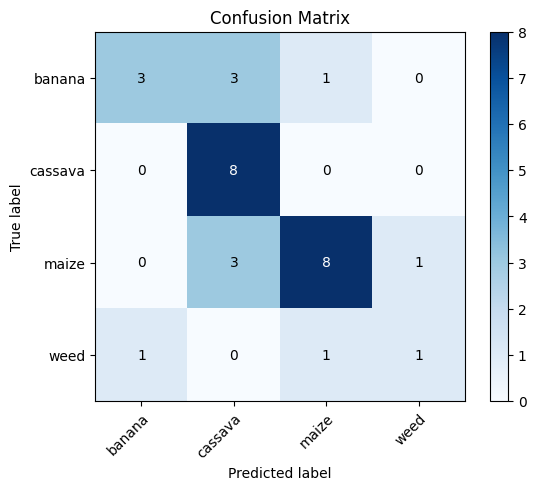

In [13]:
# Get the total number of test samples and number of classes
total_test_samples = len(test_batch.classes)
num_classes = len(test_batch.class_indices)

# Generate predictions for the test data
predictions = model.predict(test_batch, steps=total_test_samples)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels for the test data
true_labels = test_batch.classes

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Get class labels
class_labels = list(test_batch.class_indices.keys())

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(confusion_mat.shape[1]),
       yticks=np.arange(confusion_mat.shape[0]),
       xticklabels=class_labels,
       yticklabels=class_labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(j, i, format(confusion_mat[i, j], 'd'),
                ha="center", va="center", color="white" if confusion_mat[i, j] > confusion_mat.max() / 2. else "black")

# Display the plot
plt.show()

In [14]:
# Get the model's predicted labels for the test data
predicted_labels = model.predict(test_batch)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

15/15 [==============================] - 0s 16ms/step
Confusion Matrix:
[[3 3 1 0]
 [0 8 0 0]
 [0 3 8 1]
 [1 0 1 1]]


## plot accuracy, recall, and F1 score based on the predictions made by the model

In [18]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

Accuracy: 0.6666666666666666
Recall: 0.6666666666666666
F1: 0.6521212121212121


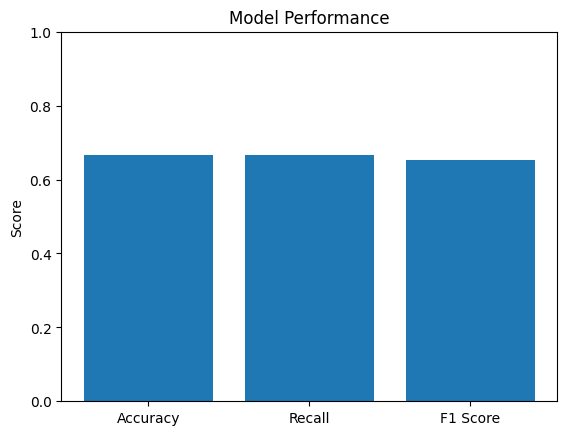

In [19]:
# Calculate accuracy, recall, and F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1:", f1)

# Create a bar plot
labels = ['Accuracy', 'Recall', 'F1 Score']
values = [accuracy, recall, f1]

plt.bar(labels, values)
plt.ylim(0, 1)  # Set the y-axis limit to match the range of accuracy, recall, and F1 score
plt.title('Model Performance')
plt.ylabel('Score')
plt.show()

Sample Image Name: maize\corn37.jpg
1/1 [==============================] - 0s 50ms/step


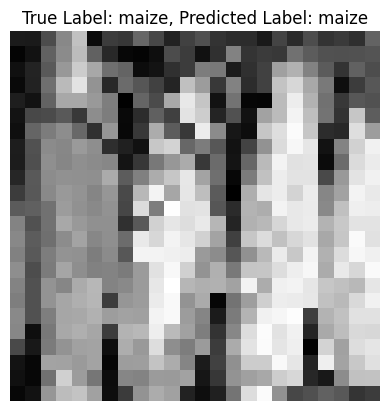

In [17]:

# Get a random test sample
sample_index = np.random.randint(len(test_batch.filenames))
sample_image = test_batch.filenames[sample_index]
sample_label = test_batch.classes[sample_index]

#sample_image = 'banana/banana4.jpg'
print('Sample Image Name: '+sample_image)


# Load and preprocess the image
img = image.load_img('datacnn/valid/'+sample_image, target_size=TS, color_mode='grayscale')
img_array = image.img_to_array(img)
img_array /= 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions on the image
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions)

# Get class labels
class_labels = list(test_batch.class_indices.keys())

# Print the image and predicted class label
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f"True Label: {class_labels[sample_label]}, Predicted Label: {class_labels[predicted_label]}")
plt.show()

In [22]:
# Get the total number of images in the test data
num_images = len(test_batch.filenames)

# Iterate over all the images
for i in range(num_images):
    # Get the image name and label at the current index
    image_name = test_batch.filenames[i]
    true_label = test_batch.classes[i]
    
    # Load and preprocess the image
    img = image.load_img('datacnn/valid/' + image_name, target_size=TS, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make predictions on the image
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions)
    
    # Get class labels
    class_labels = list(test_batch.class_indices.keys())
    
    # Print image name and predicted class
    print("Image Name:", image_name+', True Label: '+ class_labels[true_label]+',Predicted Label:'+class_labels[predicted_label])
   
    print()

print("Predicted Class:", class_labels[predicted_label])

1/1 [==============================] - 0s 52ms/step
Image Name: banana\banana.jpg, True Label: banana,Predicted Label:maize

1/1 [==============================] - 0s 61ms/step
Image Name: banana\banana2.jpg, True Label: banana,Predicted Label:cassava

1/1 [==============================] - 0s 51ms/step
Image Name: banana\banana3.jpg, True Label: banana,Predicted Label:cassava

1/1 [==============================] - 0s 58ms/step
Image Name: banana\banana4.jpg, True Label: banana,Predicted Label:cassava

1/1 [==============================] - 0s 48ms/step
Image Name: banana\banana623.jpg, True Label: banana,Predicted Label:banana

1/1 [==============================] - 0s 51ms/step
Image Name: banana\banana794.jpg, True Label: banana,Predicted Label:banana

1/1 [==============================] - 0s 52ms/step
Image Name: banana\banana973.jpg, True Label: banana,Predicted Label:banana

1/1 [==============================] - 0s 68ms/step
Image Name: cassava\cassava1.jpg, True Label: cassav

15/15 [==============================] - 0s 17ms/step
AUC for Class banana : 0.7888198757763976
AUC for Class cassava : 0.9602272727272727
AUC for Class maize : 0.9212962962962963
AUC for Class weed : 0.7777777777777779


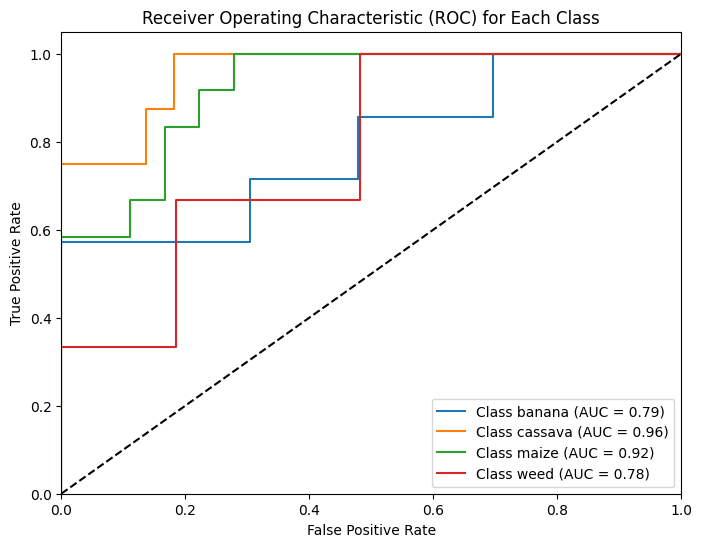

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Make predictions on the test data
y_pred = model.predict(test_batch)

# Calculate the AUC for each class
auc_scores = []
for i in range(len(class_labels)):
    true_labels = np.where(test_batch.classes == i, 1, 0)
    auc = roc_auc_score(true_labels, y_pred[:, i])
    auc_scores.append(auc)
    print("AUC for Class", class_labels[i], ":", auc)

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    true_labels = np.where(test_batch.classes == i, 1, 0)
    fpr, tpr, _ = roc_curve(true_labels, y_pred[:, i])
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_labels[i], auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Each Class')
plt.legend(loc='lower right')
plt.show()



In [26]:
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS

training_percentage = (SPE * BS) / len(train_batch.classes) * 100
validation_percentage = (VS * BS) / len(valid_batch.classes) * 100

In [27]:
print(training_percentage)
print(validation_percentage)

98.96907216494846
68.08510638297872
